In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import patches 

Se cargan los datos descargados de datos abiertos colombia

In [3]:
df = pd.read_csv('productos.csv')
df.head(10)

,MES,Certificado de Carencia de Informes por Tráfico de Estupefacientes expedidos,Autorizaciones Extraordinarias para el Manejo de Sustancias Químicas Controladas expedidas,Conceptos emitidos a Licencias Previas de Importación,Autorizaciones previas a la exportación expedidas,Año
0,SEPTIEMBRE,204,34,450,81,2021
1,OCTUBRE,164,13,467,110,2021
2,NOVIEMBRE,162,14,497,68,2021
3,DICIEMBRE,345,12,413,64,2021
4,ENERO,165,18,402,80,2022
5,FEBRERO,219,17,643,90,2022
6,MARZO,212,16,807,83,2022
7,ABRIL,206,16,826,81,2022
8,MAYO,262,26,908,69,2022
9,JUNIO,222,19,790,72,2022


Se le da print a los nombres de las columnas para identificarlas

In [4]:
nombre_columna = df.columns.to_list()
nombre_columna

['MES',
 'Certificado de Carencia de Informes por Tráfico de Estupefacientes expedidos',
 'Autorizaciones Extraordinarias para el Manejo de Sustancias Químicas Controladas expedidas',
 'Conceptos emitidos a Licencias Previas de Importación',
 'Autorizaciones previas a la exportación expedidas',
 'Año']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 6 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   MES                                                                                         264 non-null    object
 1   Certificado de Carencia de Informes por Tráfico de Estupefacientes expedidos                264 non-null    int64 
 2   Autorizaciones Extraordinarias para el Manejo de Sustancias Químicas Controladas expedidas  264 non-null    int64 
 3   Conceptos emitidos a Licencias Previas de Importación                                       264 non-null    int64 
 4   Autorizaciones previas a la exportación expedidas                                           264 non-null    int64 
 5   Año                                                

Se limpian los valoores N/A o None

In [6]:
df.dropna()
df.head(10)

,MES,Certificado de Carencia de Informes por Tráfico de Estupefacientes expedidos,Autorizaciones Extraordinarias para el Manejo de Sustancias Químicas Controladas expedidas,Conceptos emitidos a Licencias Previas de Importación,Autorizaciones previas a la exportación expedidas,Año
0,SEPTIEMBRE,204,34,450,81,2021
1,OCTUBRE,164,13,467,110,2021
2,NOVIEMBRE,162,14,497,68,2021
3,DICIEMBRE,345,12,413,64,2021
4,ENERO,165,18,402,80,2022
5,FEBRERO,219,17,643,90,2022
6,MARZO,212,16,807,83,2022
7,ABRIL,206,16,826,81,2022
8,MAYO,262,26,908,69,2022
9,JUNIO,222,19,790,72,2022


Se renombran las columnas para hacer mas facil la escritura de codigo (Los nuevos nombres son las iniciales de los nombres originales)

In [7]:
df = df.rename(columns={'MES': 'mes', 'Certificado de Carencia de Informes por Tráfico de Estupefacientes expedidos': 'ccitee', 'Autorizaciones Extraordinarias para el Manejo de Sustancias Químicas Controladas expedidas':'aemsqce', 'Conceptos emitidos a Licencias Previas de Importación':'celpi', 'Autorizaciones previas a la exportación expedidas':'apee', 'Año':'año'})
df

,mes,ccitee,aemsqce,celpi,apee,año
0,SEPTIEMBRE,204,34,450,81,2021
1,OCTUBRE,164,13,467,110,2021
2,NOVIEMBRE,162,14,497,68,2021
3,DICIEMBRE,345,12,413,64,2021
4,ENERO,165,18,402,80,2022
...,...,...,...,...,...,...
259,AGOSTO,292,46,1289,68,2024
260,SEPTIEMBRE,483,58,1422,61,2024
261,OCTUBRE,213,58,1528,61,2024
262,NOVIEMBRE,268,42,1334,74,2024


Se eliminan los valores duplicados de los datos

In [8]:
df = df.drop_duplicates()

Se hace una relacion entre las actividades por año

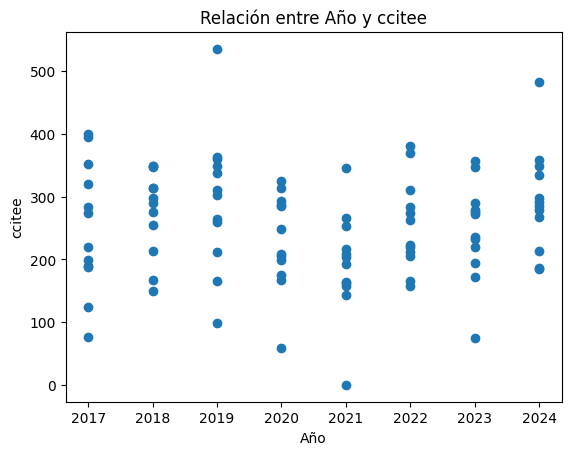

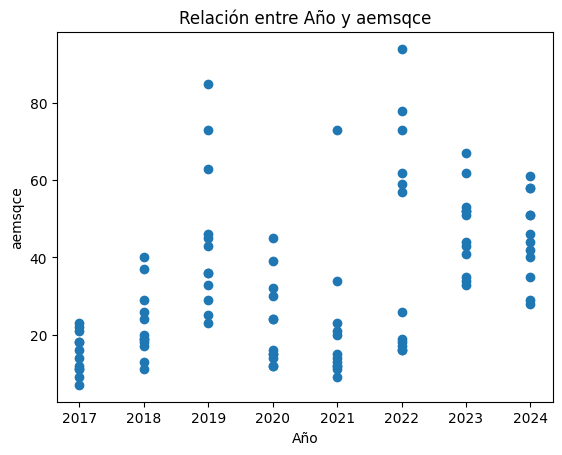

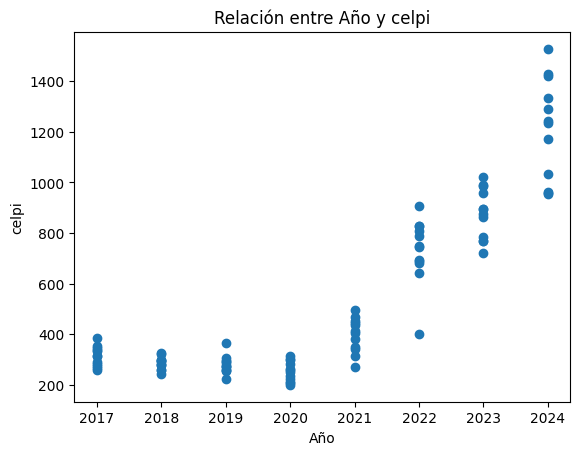

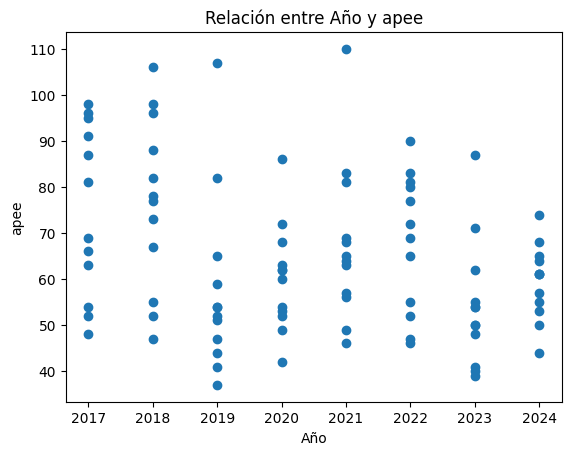

In [9]:
columnas_a_relacionar = ['ccitee', 'aemsqce', 'celpi', 'apee']

for columna in columnas_a_relacionar:
    plt.scatter(df['año'], df[columna])
    
    plt.xlabel('Año')
    plt.ylabel(columna)
    plt.title(f'Relación entre Año y {columna}')
    
    plt.show()

Se separan la informacion por año para analizar cada año individualmente.

In [13]:
años_unicos = df['año'].unique()

dataframes_por_año = {}

for año in años_unicos:
    dataframes_por_año[año] = df[df['año'] == año]

df1 = dataframes_por_año[2021]
df1

,mes,ccitee,aemsqce,celpi,apee,año
0,SEPTIEMBRE,204,34,450,81,2021
1,OCTUBRE,164,13,467,110,2021
2,NOVIEMBRE,162,14,497,68,2021
3,DICIEMBRE,345,12,413,64,2021
103,ENERO,0,12,269,63,2021
104,FEBRERO,143,73,379,69,2021
105,MARZO,158,20,442,57,2021
106,ABRIL,265,21,348,65,2021
107,MAYO,253,9,340,49,2021
108,JUNIO,209,11,315,46,2021


Se grafica la actividad de todo el papeleo por mes, para saber en que mes hay la mayor actividad del año

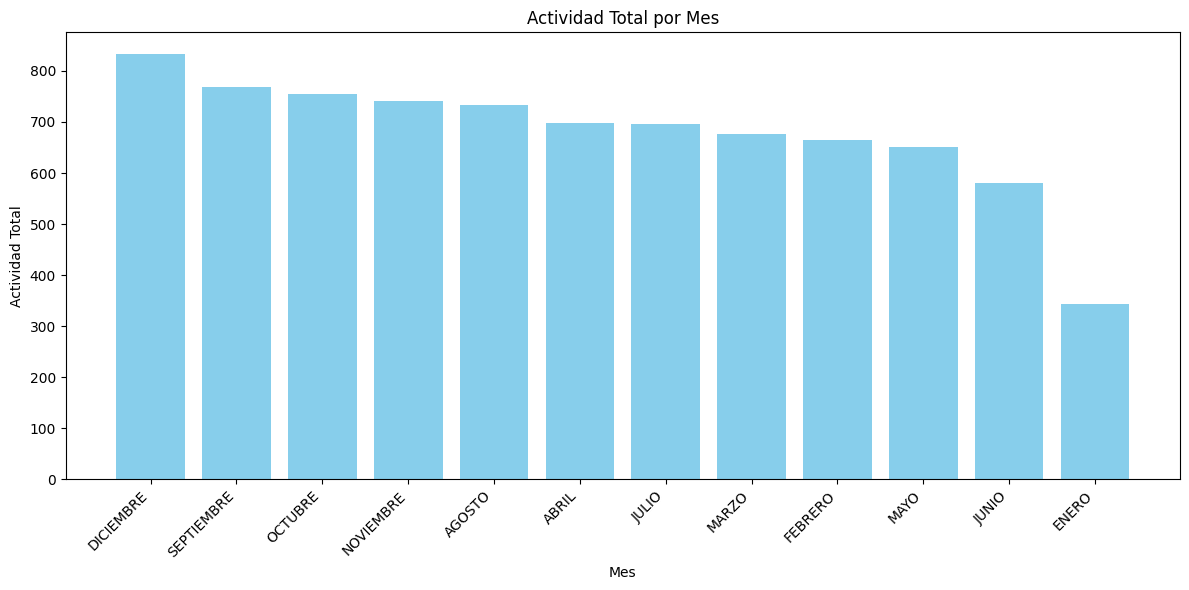

In [16]:
df1.loc[:, 'actividad_total'] = df1[['ccitee', 'aemsqce', 'celpi', 'apee']].sum(axis=1)

df1 = df1.sort_values(by='actividad_total', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df1['mes'], df1['actividad_total'], color='skyblue')
plt.xlabel('Mes')
plt.ylabel('Actividad Total')
plt.title('Actividad Total por Mes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

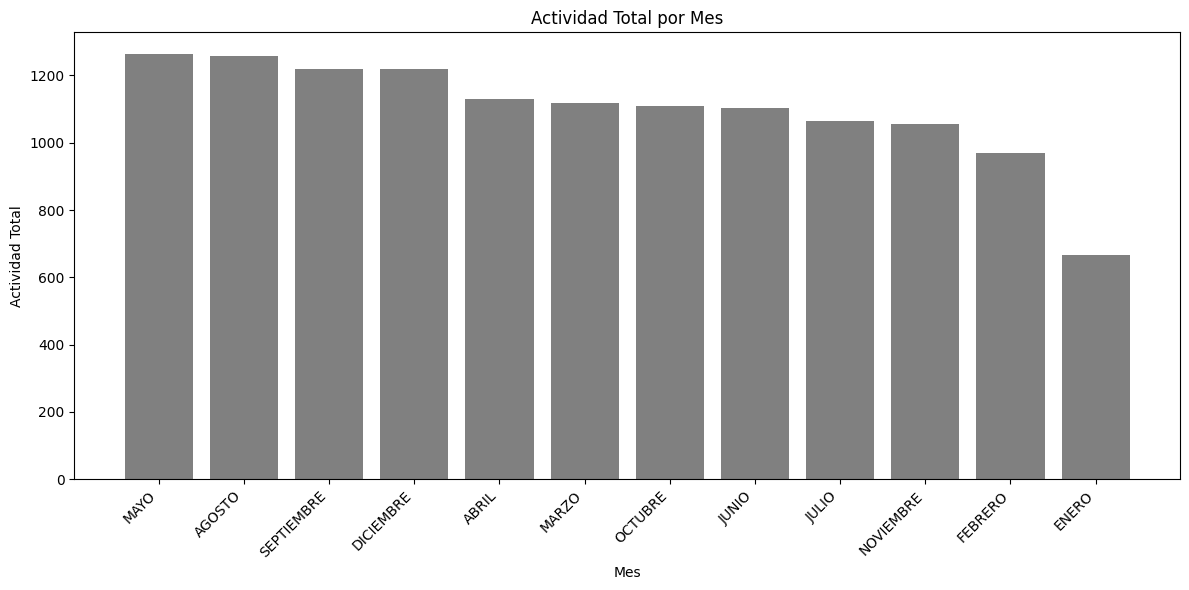

In [18]:
df2 = dataframes_por_año[2022]

df2.loc[:, 'actividad_total'] = df2[['ccitee', 'aemsqce', 'celpi', 'apee']].sum(axis=1)

df2 = df2.sort_values(by='actividad_total', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df2['mes'], df2['actividad_total'], color='gray')
plt.xlabel('Mes')
plt.ylabel('Actividad Total')
plt.title('Actividad Total por Mes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

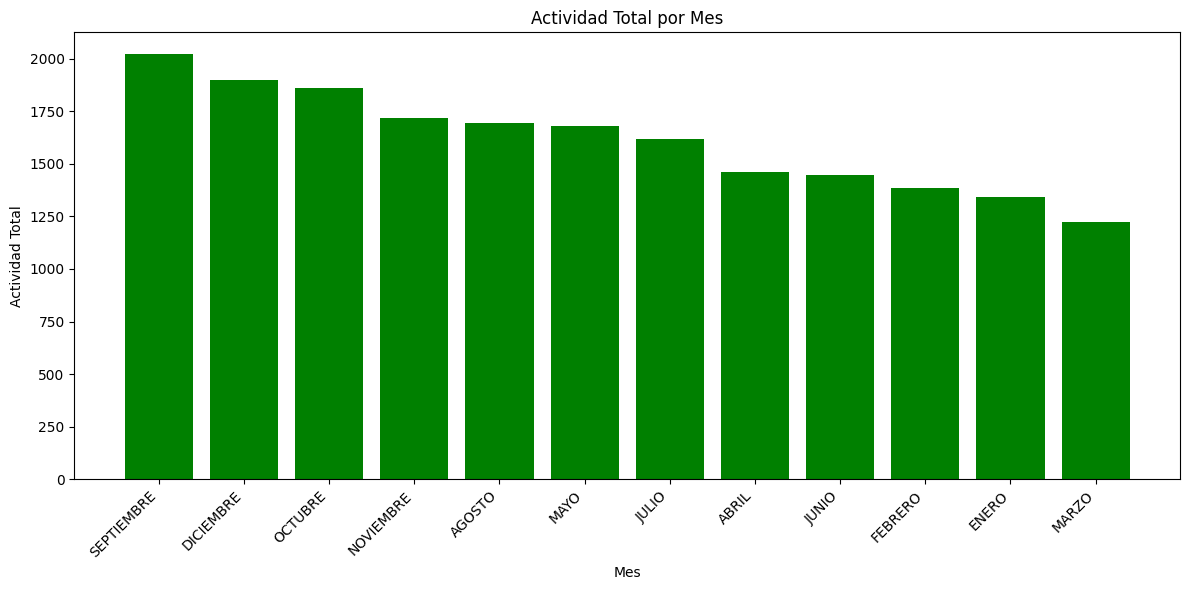

In [20]:
df3 = dataframes_por_año[2024]

df3.loc[:, 'actividad_total'] = df3[['ccitee', 'aemsqce', 'celpi', 'apee']].sum(axis=1)

df3 = df3.sort_values(by='actividad_total', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(df3['mes'], df3['actividad_total'], color='green')
plt.xlabel('Mes')
plt.ylabel('Actividad Total')
plt.title('Actividad Total por Mes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()